In [1]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
import pandas as pd 
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
kompas = pd.read_csv('kompas.csv', index_col=0)

In [3]:
kompas.head()
paragraf = kompas.paragraf

In [4]:
type(paragraf)

pandas.core.series.Series

In [5]:
par = []
kat = []

In [6]:
for kalimat in paragraf: 
    par.append(kalimat.strip())

In [7]:
for word in par: 
    for kata in word.split(): 
        if kata.isalpha(): 
            kat.append(kata)
        

In [44]:
with open('stopwords-id.txt','r') as f: 
    stopword = f.readlines()

In [45]:
for i in range(len(stopword)): 
    stopword[i]=stopword[i].strip()

In [46]:
for kata in kat: 
    if (kata.lower() in stopword):
        kat.remove(kata)
#         print(f'removing {kata} from the list')

In [47]:
for i in range(len(kat)): 
    kat[i]=kat[i].lower()

In [48]:
sering = Counter(kat).most_common(5)
from pprint import pprint
pprint(sering)
# teks = " ".join(kata)

[('mudik', 127), ('tol', 114), ('jawa', 107), ('jalan', 100), ('kota', 96)]


In [49]:
teks = ' '.join(kat)
wc = WordCloud().generate(teks)

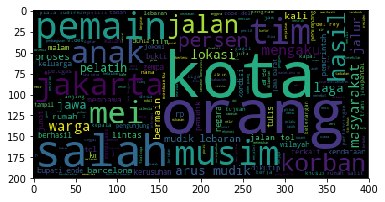

In [50]:
plt.imshow(wc)